# Análisis Integral de Ventas - Proyecto Aurelion

**Objetivo:** Este notebook consolida los análisis exploratorio, estadístico y experto de los datos de ventas de la tienda Aurelion. El objetivo es extraer insights accionables sobre patrones de venta, comportamiento del cliente y afinidad de productos, presentando los resultados a través de visualizaciones mejoradas para mayor claridad.

## 1. Configuración del Entorno y Carga de Datos

Se importan las librerías necesarias y se cargan los datos limpios desde `clean_sales.csv`. Se realizan ajustes iniciales en los tipos de datos para asegurar la consistencia del análisis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.patches import Patch
import seaborn as sns
import datetime as dt
from mlxtend.frequent_patterns import apriori, association_rules


# Estilo base de Matplotlib
plt.style.use("dark_background")

# Tema global de Seaborn
sns.set_theme(
    style="white",     # mantiene líneas y bordes visibles
    context="talk",    # tamaños de texto amplios (para presentaciones)
    palette="inferno"  # paleta cálida: amarillo → naranja → púrpura
)

# Ajustes globales de Matplotlib para un fondo oscuro elegante y consistente
plt.rcParams.update({
    # --- Fondos ---
    "figure.facecolor": "#111111",   # fondo de la figura
    "axes.facecolor": "#111111",     # fondo de los ejes
    "savefig.facecolor": "#111111",
    "savefig.edgecolor": "#111111",

    # --- Texto y colores ---
    "text.color": "white",
    "axes.labelcolor": "white",
    "axes.edgecolor": "#888888",
    "xtick.color": "white",
    "ytick.color": "white",

    # --- Grilla ---
    "grid.color": "#333333",
    "grid.linestyle": "--",
    "grid.alpha": 0.3,

    # --- Ejes y estilo visual ---
    "axes.spines.top": False,       # sin borde superior
    "axes.spines.right": False,     # sin borde derecho

})

# --- Configuración de Estilo para Visualizaciones ---
# sns.set_theme(style="whitegrid", palette="viridis")
plt.rcParams["figure.figsize"] = (14, 8)
plt.rcParams["axes.titlesize"] = 18
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["legend.fontsize"] = 12

# --- OPCIONAL: Ajuste de contexto para gráficos grandes ---
sns.set_context("talk", font_scale=1.1)

print("🎨 Estilo oscuro activado: todos los gráficos se mostrarán en fondo oscuro con texto blanco.")

# --- Carga y Preparación de Datos ---
try:
    df = pd.read_csv("../output/clean_sales.csv")
    df["fecha"] = pd.to_datetime(df["fecha"])
    df["importe"] = pd.to_numeric(df["importe"])
    print("Datos cargados y listos para el análisis.")
    display(df.head())
except FileNotFoundError:
    print("Error: No se encontró el archivo '../output/clean_sales.csv'. Verifica la ruta.")

🎨 Estilo oscuro activado: todos los gráficos se mostrarán en fondo oscuro con texto blanco.
Datos cargados y listos para el análisis.


,id_venta,fecha,id_cliente,medio_pago,id_producto,cantidad,importe,nombre_producto,categoria,precio_unitario,nombre_cliente,email,ciudad,fecha_alta
0,1,2024-06-19,62,tarjeta,90,1,2902,Toallas Húmedas x50,Limpieza,2902,Guadalupe Romero,guadalupe.romero@mail.com,Carlos Paz,2023-03-03
1,2,2024-03-17,49,qr,82,5,11970,Aceitunas Negras 200g,Alimentos,2394,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18
2,2,2024-03-17,49,qr,39,5,2345,Helado Vainilla 1L,Alimentos,469,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18
3,2,2024-03-17,49,qr,70,2,8122,Fernet 750ml,Alimentos,4061,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18
4,2,2024-03-17,49,qr,22,1,2069,Medialunas de Manteca,Alimentos,2069,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18


## 2. Análisis Exploratorio y Estadístico

Se realiza un análisis general de las variables numéricas para entender su distribución, detectar valores atípicos y encontrar correlaciones.

In [2]:
# --- Estadísticas Descriptivas ---
print("--- Estadísticas Descriptivas ---")
display(df[['cantidad', 'importe', 'precio_unitario']].describe())

--- Estadísticas Descriptivas ---


,cantidad,importe,precio_unitario
count,343.000000,343.000000,343.000000
mean,2.962099,7730.078717,2654.495627
std,1.366375,5265.543077,1308.694720
min,1.000000,272.000000,272.000000
25%,2.000000,3489.000000,1618.500000
50%,3.000000,6702.000000,2512.000000
75%,4.000000,10231.500000,3876.000000
max,5.000000,24865.000000,4982.000000


### Presentación de la Media, Mediana y Desviación Estándar

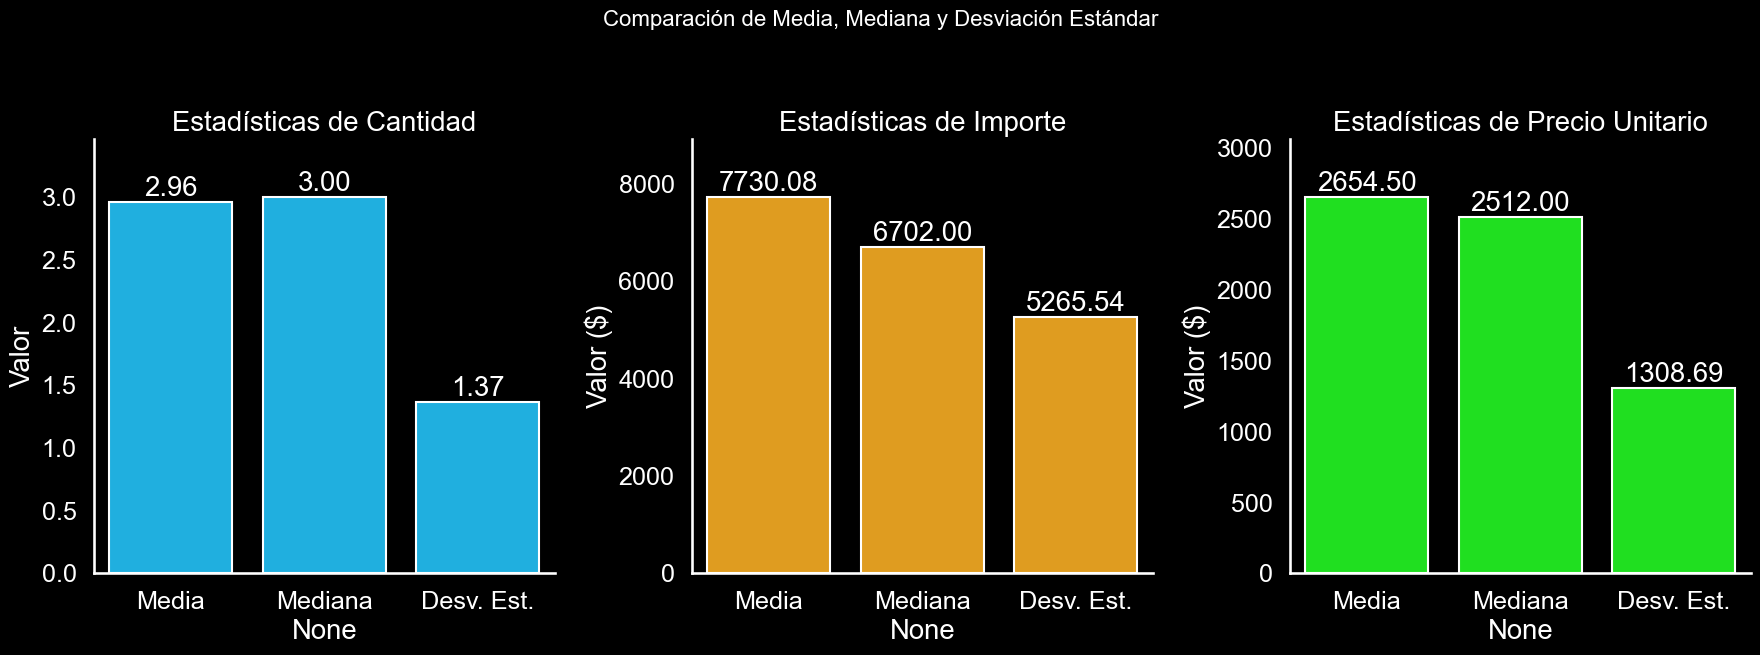

In [3]:
# --- Aplicar estilo oscuro ---
plt.style.use('dark_background')

# --- Ocultar bordes superior y derecho ---
plt.rcParams.update({
    "axes.spines.top": False,
    "axes.spines.right": False,
})
# -------------------------------------

# --- Asumiendo que 'df' ya está cargado ---

# 1. Calcular las estadísticas para cada columna
# ***** CAMBIO AQUÍ: "Std Dev" -> "Desv. Est." *****
stats_cantidad = {
    'Media': df['cantidad'].mean(),
    'Mediana': df['cantidad'].median(),
    'Desv. Est.': df['cantidad'].std() # Ajustado a español
}

stats_importe = {
    'Media': df['importe'].mean(),
    'Mediana': df['importe'].median(),
    'Desv. Est.': df['importe'].std() # Ajustado a español
}

stats_precio = {
    'Media': df['precio_unitario'].mean(),
    'Mediana': df['precio_unitario'].median(),
    'Desv. Est.': df['precio_unitario'].std() # Ajustado a español
}

# Convertir los diccionarios a Series de Pandas
s_cantidad = pd.Series(stats_cantidad, name='Cantidad')
s_importe = pd.Series(stats_importe, name='Importe')
s_precio = pd.Series(stats_precio, name='Precio Unitario')


# 2. Crear la figura y los ejes (subplots)
fig, axes = plt.subplots(1, 3, figsize=(18, 7))

# Título general para la figura
fig.suptitle('Comparación de Media, Mediana y Desviación Estándar', fontsize=16)

# --- Gráfico 1: Cantidad ---
sns.barplot(x=s_cantidad.index, y=s_cantidad.values, ax=axes[0], color='deepskyblue')
axes[0].set_title('Estadísticas de Cantidad')
axes[0].set_ylabel('Valor')

# --- Añadir etiquetas de valor ---
for patch in axes[0].patches:
    height = patch.get_height()
    axes[0].text(
        patch.get_x() + patch.get_width() / 2,
        height,
        f'{height:.2f}',
        ha='center',
        va='bottom',
        color='white'
    )

# ***** CAMBIO AQUÍ: Añadir 10% de espacio en el eje Y *****
ymin, ymax = axes[0].get_ylim()
axes[0].set_ylim(ymin, ymax * 1.10)
# -----------------------------------------------------

# --- Gráfico 2: Importe ---
sns.barplot(x=s_importe.index, y=s_importe.values, ax=axes[1], color='orange')
axes[1].set_title('Estadísticas de Importe')
axes[1].set_ylabel('Valor ($)')

# --- Añadir etiquetas de valor ---
for patch in axes[1].patches:
    height = patch.get_height()
    axes[1].text(
        patch.get_x() + patch.get_width() / 2,
        height,
        f'{height:.2f}',
        ha='center',
        va='bottom',
        color='white'
    )

# ***** CAMBIO AQUÍ: Añadir 10% de espacio en el eje Y *****
ymin, ymax = axes[1].get_ylim()
axes[1].set_ylim(ymin, ymax * 1.10)
# -----------------------------------------------------

# --- Gráfico 3: Precio Unitario ---
sns.barplot(x=s_precio.index, y=s_precio.values, ax=axes[2], color='lime')
axes[2].set_title('Estadísticas de Precio Unitario')
axes[2].set_ylabel('Valor ($)')

# --- Añadir etiquetas de valor ---
for patch in axes[2].patches:
    height = patch.get_height()
    axes[2].text(
        patch.get_x() + patch.get_width() / 2,
        height,
        f'{height:.2f}',
        ha='center',
        va='bottom',
        color='white'
    )

# ***** CAMBIO AQUÍ: Añadir 10% de espacio en el eje Y *****
ymin, ymax = axes[2].get_ylim()
axes[2].set_ylim(ymin, ymax * 1.10)
# -----------------------------------------------------


# Ajustar el layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajusta para el título general

# --- Mostrar el gráfico en el notebook ---
plt.show()

### Interpretación de Estadísticas Clave
Estos gráficos nos dan una "radiografía" de nuestras variables de venta. La observación más importante es la diferencia entre la Media (promedio) y la Mediana (valor central), especialmente en Importe y Precio Unitario.

- Importe y Precio Unitario: En ambos gráficos, la barra de la Media es notablemente más alta que la de la Mediana. Esto es un indicador claro de outliers (valores atípicos): unas pocas ventas de importe muy alto y/o productos muy caros están "inflando" el promedio. Por lo tanto, la Mediana es una métrica mucho más honesta y confiable para entender el importe o precio "típico" de una transacción.

- Cantidad: Es probable que la Media y la Mediana sean muy similares, lo que indica que la cantidad de productos por venta es bastante consistente y no sufre de valores extremos.

- Desv. Est. (Desviación Estándar): Esta barra mide la "dispersión" o variabilidad. La alta barra en Importe y Precio Unitario confirma que nuestros datos están muy esparcidos (tenemos ventas/precios muy baratos y muy caros). Una Desviación Estándar baja en Cantidad confirmaría que la mayoría de las ventas tienen un número de artículos similar.

### 2.1. Distribución de Variables Numéricas

Visualizamos la distribución de las variables clave para identificar su forma y posibles sesgos.

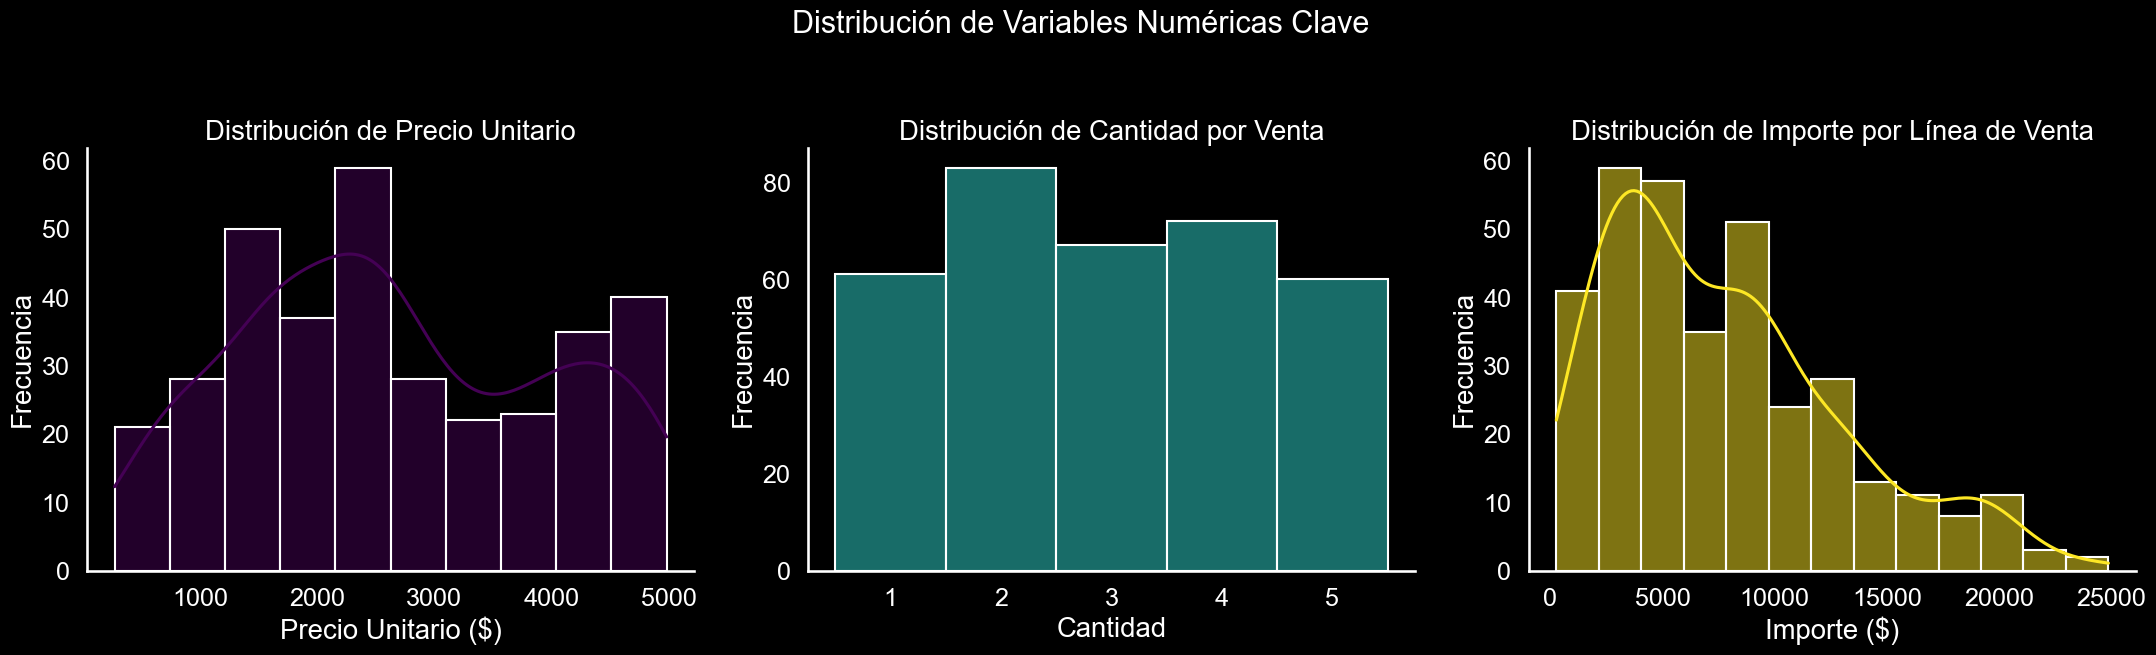

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(22, 7))
fig.suptitle('Distribución de Variables Numéricas Clave', fontsize=22)

sns.histplot(df['precio_unitario'], kde=True, ax=axes[0], color='#440154')
axes[0].set_title('Distribución de Precio Unitario')
axes[0].set_xlabel('Precio Unitario ($)')
axes[0].set_ylabel('Frecuencia')

sns.histplot(df['cantidad'], kde=False, ax=axes[1], discrete=True, color='#21918c')
axes[1].set_title('Distribución de Cantidad por Venta')
axes[1].set_xlabel('Cantidad')
axes[1].set_ylabel('Frecuencia')
axes[1].set_xticks(df['cantidad'].unique()) # Asegurar ticks enteros

sns.histplot(df['importe'], kde=True, ax=axes[2], color='#fde725')
axes[2].set_title('Distribución de Importe por Línea de Venta')
axes[2].set_xlabel('Importe ($)')
axes[2].set_ylabel('Frecuencia')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### **Interpretación de la Distribución de Variables Numéricas Clave**:

#### **1. Distribución de Precio Unitario**:
- La **distribución** del **precio unitario** muestra una forma **asimétrica**, con un **pico** cerca de **$2,000**.
- La **mayoría de los productos** tiene un precio **por debajo de $3,000**, y hay una caída en la frecuencia a medida que el precio aumenta, indicando que los precios más altos son **menos frecuentes**.
- El **rango de precios** está entre **$1,000 y $5,000**, y los precios más bajos son más comunes, lo que sugiere que los productos en la tienda son **más accesibles**.
- La **curva de densidad** (morada) confirma que la mayoría de los productos se agrupan en el rango más bajo de precios.

#### **2. Distribución de Cantidad por Venta**:
- La **distribución** de **cantidad por venta** muestra una forma bastante **uniforme**, con un ligero aumento en la frecuencia de las **ventas con 1 a 3 unidades**.
- Los productos más vendidos tienden a estar en la gama de **1 a 3 unidades**, con una caída de frecuencia cuando la cantidad aumenta más allá de **4 o 5 unidades**.
- No hay una **asimetría significativa** en esta variable, lo que sugiere que la **cantidad de productos vendidos por transacción** se mantiene en un rango pequeño y estable.

#### **3. Distribución de Importe por Línea de Venta**:
- La **distribución** del **importe** tiene una forma de **sesgo positivo** (asimetría hacia la derecha), lo que significa que la mayoría de las transacciones están en el **rango inferior** de importes.
- La **mayoría de las transacciones** tiene un importe **por debajo de $10,000**, con una mayor frecuencia de transacciones en el rango de **$5,000 a $8,000**.
- La **curva de densidad** (amarilla) muestra un **declive rápido** a medida que el importe aumenta, sugiriendo que las **ventas de alto valor** son menos comunes. Los **outliers** por encima de **$20,000** representan transacciones **con valores mucho mayores** que el resto.

---

### **Resumen**:
1. **Precio Unitario**: Los precios están concentrados en el rango bajo, principalmente por debajo de **$3,000**, con pocas transacciones a precios más altos.
2. **Cantidad de Venta**: La mayoría de las transacciones involucran entre **1 y 3 unidades** de productos, con pocas transacciones de más de **5 unidades**.
3. **Importe Total de Venta**: El importe está concentrado en el rango de **$5,000 a $10,000**, con algunas transacciones de valor mucho más alto, lo que indica que hay ventas excepcionales con importes superiores a **$20,000**.


### 2.2. Detección de Outliers (Valores Atípicos)

Los boxplots nos ayudan a identificar visualmente valores que se desvían significativamente del resto de los datos.

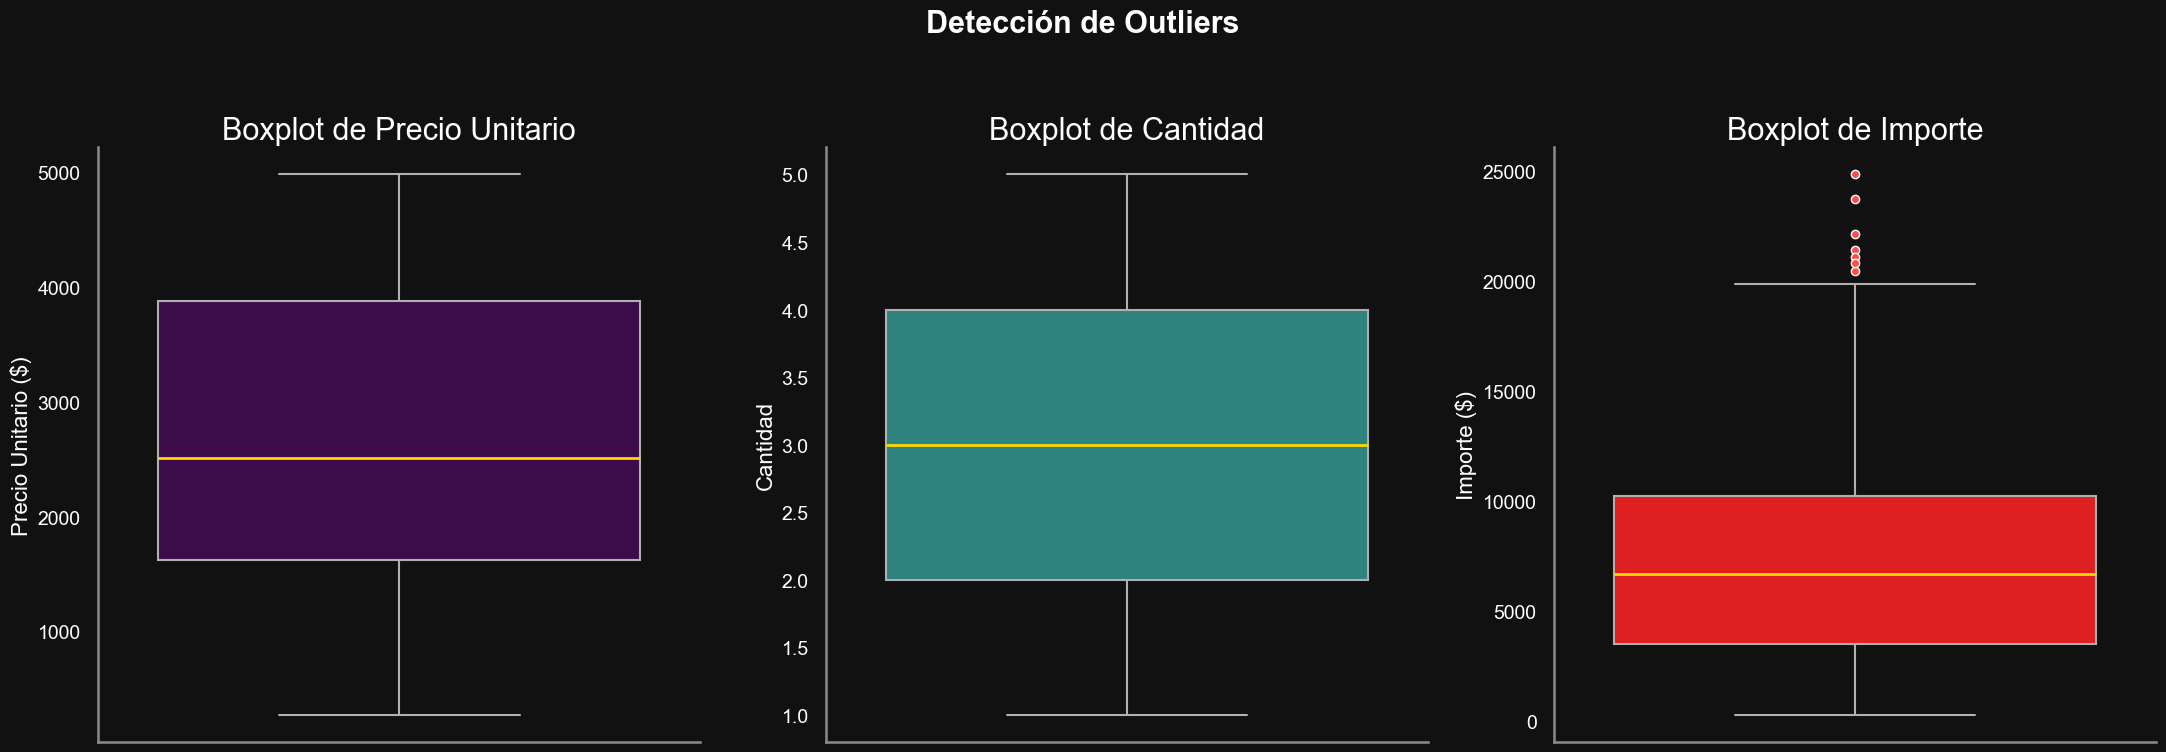

In [5]:
# Establecer fondo oscuro globalmente para todo el gráfico
plt.style.use("dark_background")

# Configuración de Seaborn para fondo oscuro
sns.set_theme(style="white", context="talk", palette="inferno")

# Aseguramos que los parámetros de Matplotlib respeten el fondo oscuro
plt.rcParams.update({
    "figure.figsize": (22, 8),
    "axes.titlesize": 22,
    "axes.labelsize": 16,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 14,
    "figure.facecolor": "#111111",  # Fondo gris oscuro de toda la figura
    "axes.facecolor": "#111111",    # Fondo oscuro en los ejes
    "axes.edgecolor": "#888888",    # Bordes grises para los ejes
    "xtick.color": "white",         # Color de las etiquetas de los ticks
    "ytick.color": "white",         # Color de las etiquetas de los ticks
    "text.color": "white"           # Color del texto en todo el gráfico
})

# Crear figura y subgráficos
fig, axes = plt.subplots(1, 3, figsize=(22, 8))
fig.suptitle('Detección de Outliers', fontsize=22, weight='bold', color='white')

# Estilos comunes para todos los boxplots
common_props = {
    'boxprops': {'edgecolor': '#B0B0B0', 'linewidth': 1.5},      # borde gris claro de la caja
    'whiskerprops': {'color': '#B0B0B0', 'linewidth': 1.5},       # bigotes gris claro
    'capprops': {'color': '#B0B0B0', 'linewidth': 1.5},           # "tapas" del bigote
    'medianprops': {'color': 'gold', 'linewidth': 2},             # línea de la mediana dorada
    'flierprops': {
        'marker': 'o',
        'markerfacecolor': '#ff4d4d',   # puntos rojos para outliers
        'markeredgecolor': 'white',
        'markersize': 6
    }
}

# Boxplot de Precio Unitario
sns.boxplot(
    y=df['precio_unitario'],
    ax=axes[0],
    color='#440154',  # Púrpura oscuro
    **common_props
)
axes[0].set_title('Boxplot de Precio Unitario', color='white')
axes[0].set_ylabel('Precio Unitario ($)', color='white')

# Eliminar bordes superior y derecho
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# Boxplot de Cantidad
sns.boxplot(
    y=df['cantidad'],
    ax=axes[1],
    color='#21918c',  # Verde azulado
    **common_props
)
axes[1].set_title('Boxplot de Cantidad', color='white')
axes[1].set_ylabel('Cantidad', color='white')

# Eliminar bordes superior y derecho
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

# Boxplot de Importe
sns.boxplot(
    y=df['importe'],
    ax=axes[2],
    color='red',  # Rojo
    **common_props
)
axes[2].set_title('Boxplot de Importe', color='white')
axes[2].set_ylabel('Importe ($)', color='white')

# Eliminar bordes superior y derecho
axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)

# Ajustar el layout para que los elementos no se solapen
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### **Interpretación de Outliers**:

- **Boxplot de Precio Unitario**:  
  La **mediana** del precio unitario está cerca de **$3,000**, con un rango intercuartílico (IQR) de **$2,000 a $4,000**, lo que indica que la mayoría de los productos tienen precios dentro de este rango. No se observan **outliers** significativos en el precio unitario, lo que sugiere una distribución estable de los precios.

- **Boxplot de Cantidad**:  
  La **mediana** de la cantidad de productos vendidos está en **3 unidades**, y el rango intercuartílico (IQR) es estrecho, entre **2 y 4 unidades**. Esto refleja una baja variabilidad en las cantidades compradas, con pocas transacciones que se desvían de este rango. No hay **outliers** en cuanto a la cantidad de productos.

- **Boxplot de Importe**:  
  La **mediana** del importe de las transacciones está en **$7,000**, con un rango intercuartílico (IQR) entre **$3,000 y $10,000**. Los **outliers** se encuentran por encima de **$20,000**, lo que indica que hay **transacciones de alto valor** que se alejan significativamente del resto de las ventas. Esto sugiere que algunas transacciones tienen importes mucho más altos que la mayoría.

  ### Conclusión y Recomendación Estratégica (La Acción)
La conclusión clave aquí no es "limpiar" o "eliminar" estos datos, sino investigarlos como una prioridad.

- **Acción Inmediata:** Se debe filtrar el dataset (df[df['importe'] > 20000]) para responder dos preguntas cruciales:

1. ¿El **'Quién'?** ¿Qué clientes (nombre_cliente) están haciendo estas compras de valor excepcional?

2. ¿El **'Qué'?** ¿Qué productos (nombre_producto) o categorías están comprando?

- **Análisis de Patrones:** ¿Es un solo cliente comprando mucho (un "cliente ballena")? ¿O son varios clientes comprando un "combo" específico de productos caros (ej. vinos de alta gama + quesos importados, o un combo mayorista de limpieza)?

- **Estrategia a Implementar:** Este análisis es la puerta de entrada para crear un segmento "VIP" o "Premium", incluso más exclusivo que los "Campeones" del RFM. Si se trata de productos, podemos crear y promocionar "Combos de Lujo" o "Combos Mayoristas" que sabemos que generan el mayor ingreso por transacción.


### 2.3. Matriz de Correlación

Un mapa de calor nos permite visualizar la fuerza y dirección de la relación entre las variables numéricas.

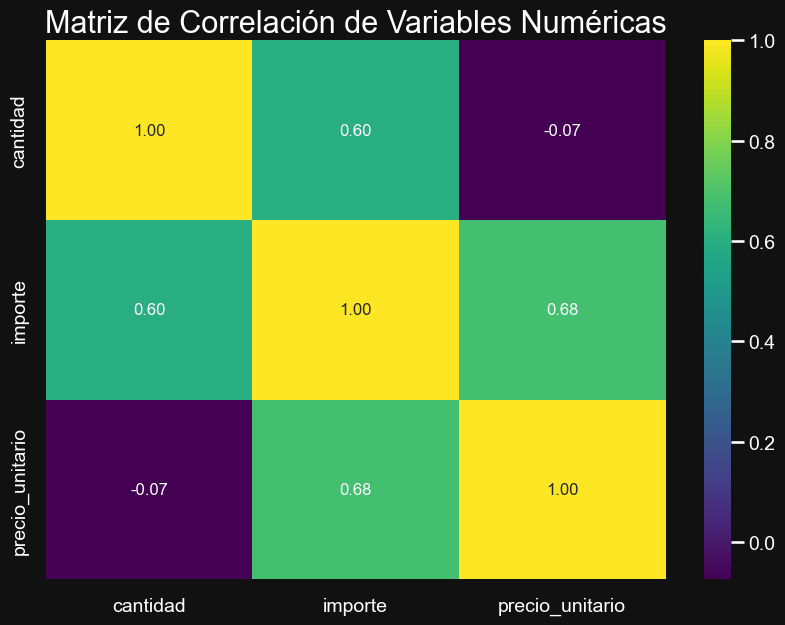

In [6]:
plt.figure(figsize=(10, 7))
correlation_matrix = df[['cantidad', 'importe', 'precio_unitario']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", annot_kws={"fontsize": 12})
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

### **Interpretación de Correlaciones**:

- **Cantidad e Importe (0.60):**  
  Hay una **correlación positiva moderada**. A medida que aumenta la cantidad de productos vendidos, el importe de la venta tiende a aumentar. Esto es lógico, ya que más productos vendidos generalmente generan más ingresos.
  
- **Cantidad y Precio Unitario (-0.07):**  
  No hay una **correlación significativa**. Esto sugiere que el precio unitario de los productos no afecta significativamente la cantidad que se vende. Es decir, no hay una relación clara entre cantidad vendida y precio unitario.

- **Importe y Precio Unitario (0.68):**  
  Hay una **correlación positiva moderada**. A medida que aumenta el precio unitario de los productos, el importe total de las ventas también tiende a aumentar, lo cual es esperado.


## 3. Análisis de Negocio

En esta sección, se responden preguntas clave del negocio a través de visualizaciones específicas.

### 3.1. ¿Qué categorías de productos generan más ingresos?

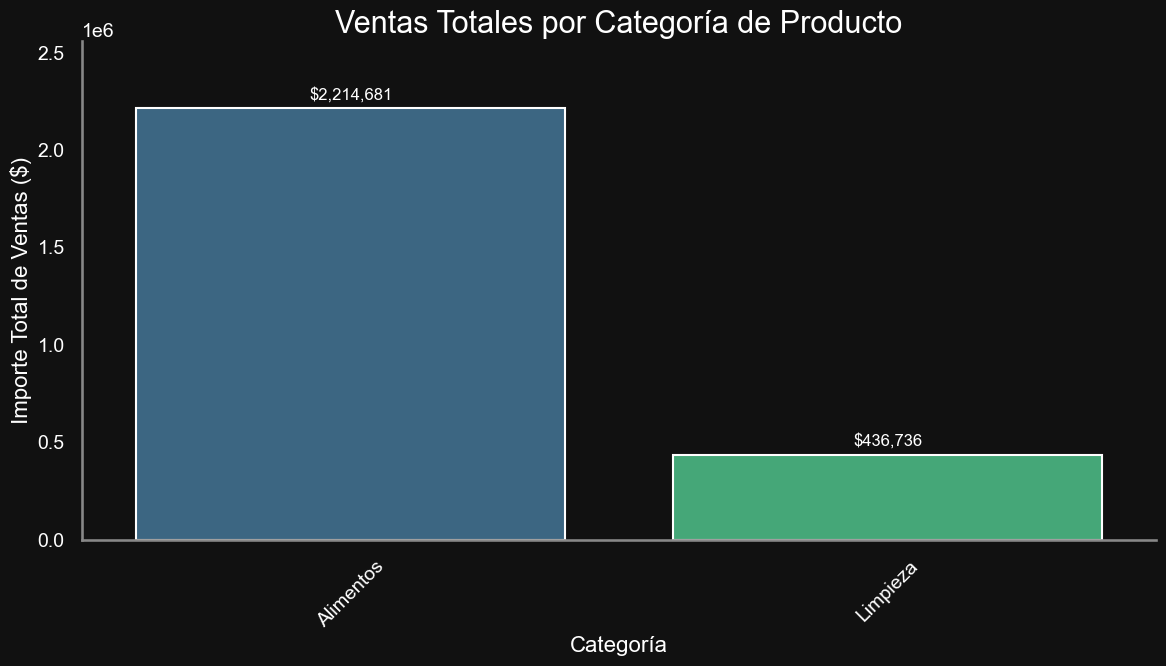

In [7]:
# Calcular los datos
ventas_por_categoria = df.groupby('categoria')['importe'].sum().sort_values(ascending=False)

# Crear la figura y el gráfico
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=ventas_por_categoria.index, y=ventas_por_categoria.values, hue=ventas_por_categoria.index, palette='viridis', legend=False)
plt.title('Ventas Totales por Categoría de Producto')
plt.xlabel('Categoría', color="white")
plt.ylabel('Importe Total de Ventas ($)', color="white")
plt.xticks(rotation=45)

# Eliminar bordes superior y derecho
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Añadir etiquetas de valor sobre las barras
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='white', xytext=(0, 10),
                textcoords='offset points')

# --- CAMBIO AQUÍ: Añadir espacio superior ---
# Obtenemos los límites actuales del eje Y
ymin, ymax = ax.get_ylim()
# Establecemos el nuevo límite superior un 10% más alto
ax.set_ylim(ymin, ymax * 1.10)
# ---------------------------------------------

# Ajustar el layout y mostrar
plt.tight_layout()
plt.show()

### **Interpretación del Gráfico: Ventas Totales por Categoría de Producto**

#### **Categoría de Alimentos**:
- La categoría **Alimentos** representa la mayor parte de las ventas, con un total de **$2,214,681** en ventas.
- Esta categoría muestra un **dominio claro** en comparación con otras categorías, lo que sugiere que los productos alimenticios son los que **generan mayores ingresos** en el negocio.
- Dado que la barra de alimentos es significativamente más grande que la de **Limpieza**, es evidente que la demanda y las ventas en esta categoría son **considerablemente más altas**.

#### **Categoría de Limpieza**:
- La categoría **Limpieza** tiene un **importe total de ventas** de **$436,736**, que es mucho menor en comparación con **Alimentos**.
- Aunque esta categoría sigue representando un valor importante, su tamaño relativo en el gráfico indica que las ventas en esta categoría son **significativamente menores** en comparación con los productos alimenticios.
- Este valor refleja un mercado más **reducido** o menos demandado en comparación con la categoría de alimentos.

### **Conclusión General**:
- El negocio depende principalmente de la venta de **Alimentos**, que genera un volumen de ventas mucho mayor que la categoría de **Limpieza**.
- Si bien **Limpieza** es una categoría importante, se podría considerar que hay una **gran oportunidad** para **diversificar** o **fortalecer las ventas en la categoría de Limpieza** para equilibrar la distribución de ingresos.
- **Estrategias de crecimiento** para **Limpieza** podrían incluir **promociones**, **nuevos productos** o **mejoras en la distribución** para aumentar el volumen de ventas en esta categoría.


### 3.2. ¿Qué ciudades concentran la mayor parte de las ventas?

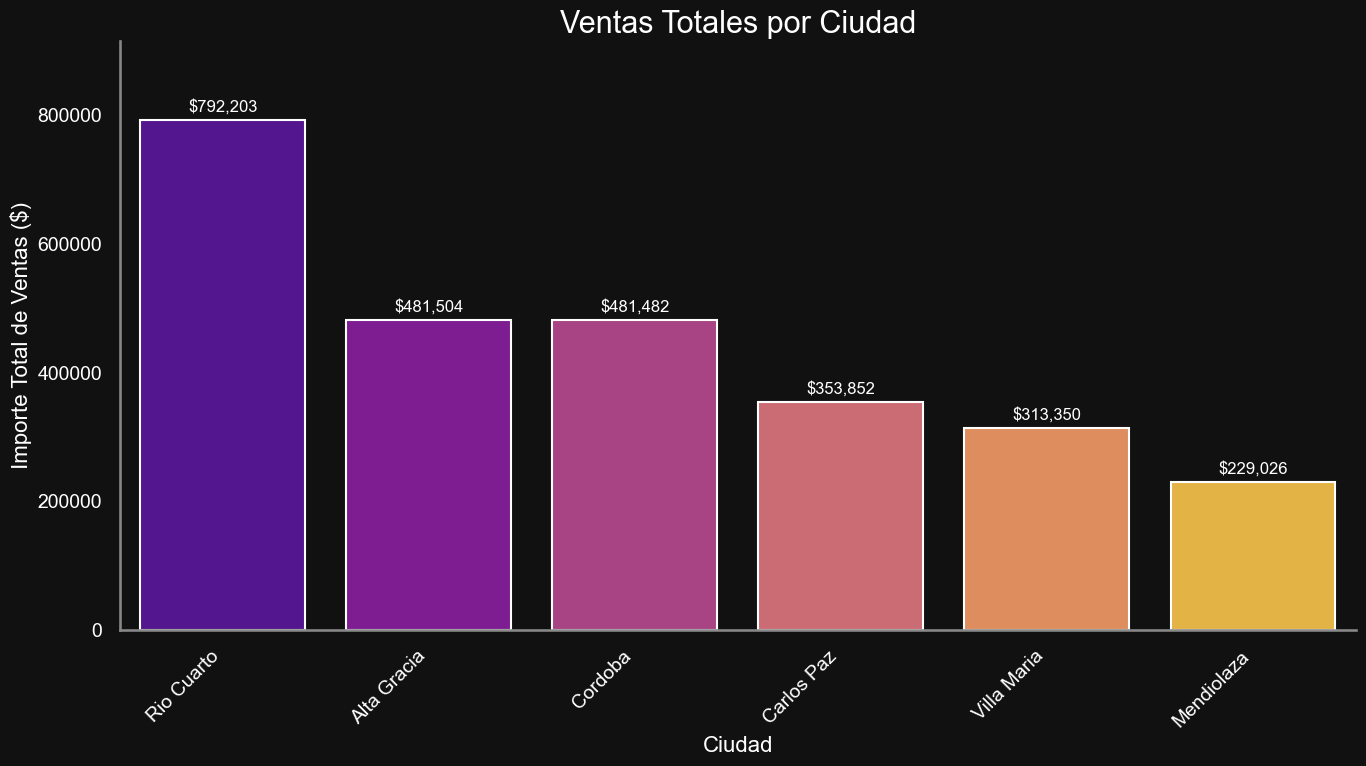

In [8]:
# Calcular los datos
ventas_por_ciudad = df.groupby('ciudad')['importe'].sum().sort_values(ascending=False)

# Crear la figura y el gráfico
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=ventas_por_ciudad.index, y=ventas_por_ciudad.values, hue=ventas_por_ciudad.index, palette='plasma', legend=False)
plt.title('Ventas Totales por Ciudad')
plt.xlabel('Ciudad', color="white")
plt.ylabel('Importe Total de Ventas ($)', color="white")
plt.xticks(rotation=45, ha='right')

# --- LÍNEAS AÑADIDAS ---
# Eliminar bordes superior y derecho
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# -------------------------

# Añadir etiquetas de valor
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='white', xytext=(0, 10),
                textcoords='offset points')

# --- LÍNEA AÑADIDA: Espacio para el título/etiquetas ---
ymin, ymax = ax.get_ylim()
ax.set_ylim(ymin, ymax * 1.10)
# -----------------------------------------------------

plt.tight_layout()
plt.show()

### **Interpretación del Gráfico: Ventas Totales por Ciudad**

- **Río Cuarto** lidera con **$792,203**, siendo el **mercado principal**.
- **Alta Gracia** y **Córdoba** tienen ventas de **$481,504** y **$481,482**, respectivamente, representando mercados de **gran relevancia**.
- **Carlos Paz** (**$353,852**), **Villa María** (**$313,350**) y **Mendiolaza** (**$229,026**) muestran **ventas más bajas**, lo que sugiere que hay **potencial de crecimiento** en estas ciudades.

### **Conclusión**:
Río Cuarto es el **principal motor de ventas**, mientras que Alta Gracia y Córdoba son mercados **fuertes**. Para las ciudades con **ventas más bajas**, se pueden implementar **estrategias de marketing** enfocadas en **promociones locales**, **mejora de la distribución** o **nuevas campañas** para aumentar su **participación en ventas**.


### 3.3. ¿Cuál es el método de pago más utilizado?

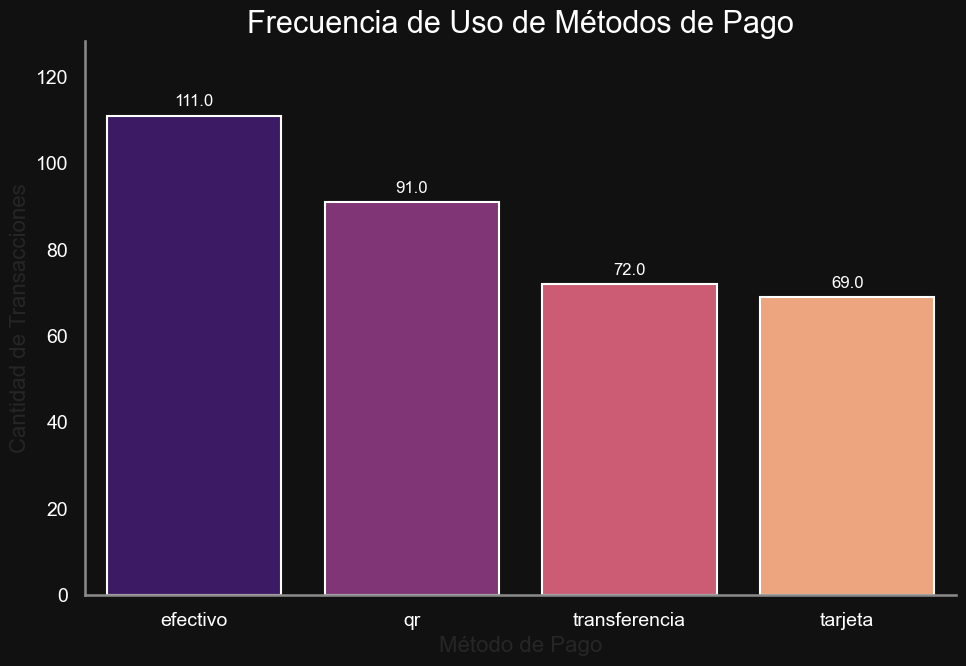

In [9]:
# Calcular los datos
metodos_pago = df['medio_pago'].value_counts()

# Crear la figura y el gráfico
plt.figure(figsize=(10, 7))
ax = sns.barplot(x=metodos_pago.index, y=metodos_pago.values, hue=metodos_pago.index, palette='magma', legend=False)
plt.title('Frecuencia de Uso de Métodos de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Cantidad de Transacciones')

# --- LÍNEAS AÑADIDAS ---
# Eliminar bordes superior y derecho
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# -------------------------

# Añadir etiquetas de valor
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='white', xytext=(0, 10),
                textcoords='offset points')

# --- LÍNEA AÑADIDA: Espacio para el título/etiquetas ---
ymin, ymax = ax.get_ylim()
ax.set_ylim(ymin, ymax * 1.10)
# -----------------------------------------------------

plt.tight_layout()
plt.show()

### **Interpretación del Gráfico: Frecuencia de Uso de Métodos de Pago**

- **Efectivo** lidera las transacciones con **111** operaciones, siendo el **método más popular**.
- **QR** es el segundo método más utilizado con **91** transacciones, mostrando una **creciente preferencia** por pagos digitales.
- **Transferencia** tiene **72** transacciones, indicando una opción preferida por quienes buscan **pagos directos**.
- **Tarjeta** es el **método menos utilizado**, con **69** transacciones, lo que sugiere **menos preferencia** por este método.

### **Conclusión**:
El **efectivo** sigue siendo el **más popular**, pero el **QR** está ganando terreno. Es recomendable fomentar métodos **digitales** para **mejorar la eficiencia** y adaptarse a las nuevas tendencias de pago.


## 4. Análisis de Series Temporales

Analizamos las ventas a nivel mensual y por día de la semana para identificar patrones estacionales y tendencias.

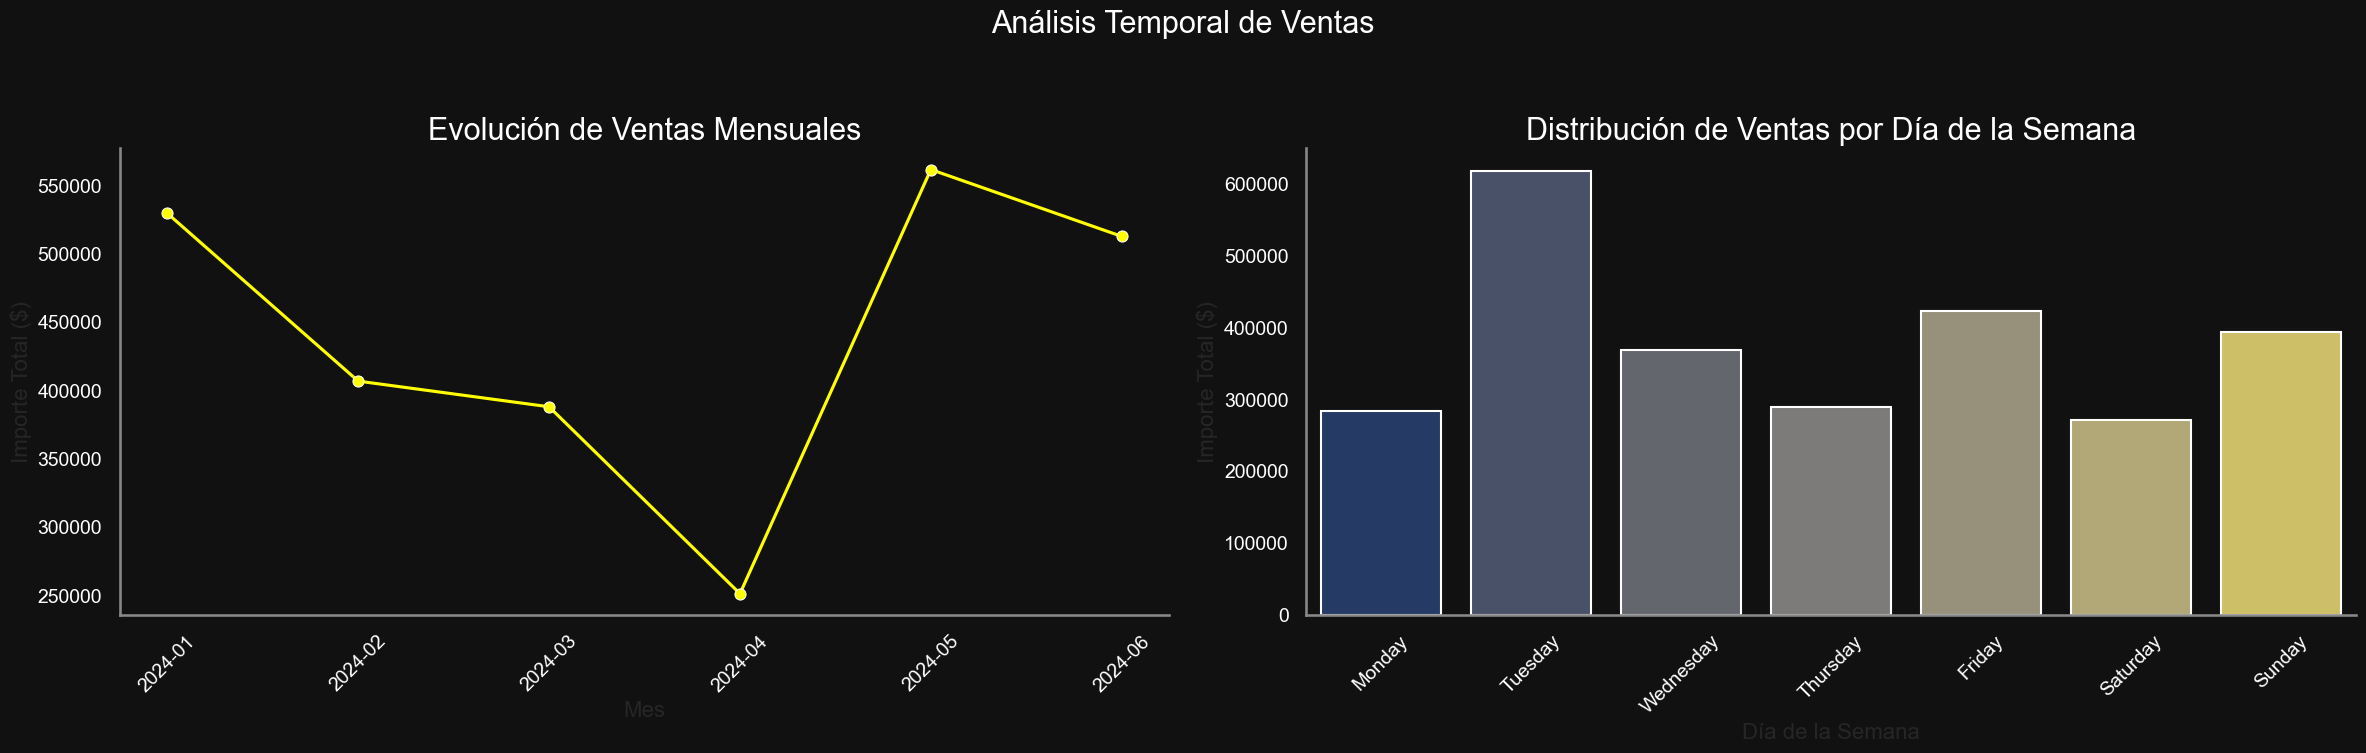

In [10]:
# --- PRE-REQUISITO: Asegurarse de que 'fecha' sea datetime ---
# Esta línea es crucial para que .dt funcione
df['fecha'] = pd.to_datetime(df['fecha'])
# -----------------------------------------------------------

# --- Cálculos ---
df['mes'] = df['fecha'].dt.to_period('M')
df['dia_semana'] = df['fecha'].dt.day_name()

ventas_mensuales = df.groupby('mes')['importe'].sum().to_frame().reset_index()
ventas_mensuales['mes'] = ventas_mensuales['mes'].astype(str)

dias_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ventas_diarias = df.groupby('dia_semana')['importe'].sum().reindex(dias_ordenados).to_frame().reset_index()

# --- Gráficos ---
fig, axes = plt.subplots(1, 2, figsize=(24, 8))
fig.suptitle('Análisis Temporal de Ventas', fontsize=22)

# Gráfico de Ventas Mensuales (axes[0])
sns.lineplot(data=ventas_mensuales, x='mes', y='importe', marker='o', ax=axes[0], color='yellow', markersize=8)
axes[0].set_title('Evolución de Ventas Mensuales')
axes[0].set_xlabel('Mes')
axes[0].set_ylabel('Importe Total ($)')
axes[0].tick_params(axis='x', rotation=45)

# --- CAMBIO AÑADIDO (para el gráfico 0) ---
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
# ------------------------------------------

# Gráfico de Ventas por Día de la Semana (axes[1])
sns.barplot(data=ventas_diarias, x='dia_semana', y='importe', hue='dia_semana', ax=axes[1], palette='cividis', legend=False)
axes[1].set_title('Distribución de Ventas por Día de la Semana')
axes[1].set_xlabel('Día de la Semana')
axes[1].set_ylabel('Importe Total ($)')
axes[1].tick_params(axis='x', rotation=45)

# --- CAMBIO AÑADIDO (para el gráfico 1) ---
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
# ------------------------------------------

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### **Interpretación del Gráfico: Análisis Temporal de Ventas**

#### **1. Evolución de Ventas Mensuales**:
- **Enero** a **marzo** muestra una **caída** en ventas, seguida por un **repunte** en **abril** y **mayo**, alcanzando los **$550,000**.
- Esta **recuperación** podría estar vinculada a **estacionalidad** o ciertos eventos que afectan las ventas, como promociones o festividades.

#### **2. Distribución de Ventas por Día de la Semana**:
- El **martes** es el día con las **mayores ventas**, alcanzando **$600,000**, seguido del **miércoles**.
- **Lunes** presenta las ventas más bajas (**$100,000**), lo que puede reflejar un **bajo consumo** al inicio de la semana.
- **Viernes** y **domingo** tienen ventas moderadas, indicando que el consumo se **incrementa** hacia el fin de semana.

### **Conclusión y Recomendaciones**:

- **Estrategia de recuperación**: Aprovechar la **recuperación en abril y mayo** para implementar **promociones adicionales** en los primeros meses del año y **maximizar ventas**.
  
- **Optimización de días**:
  - **Lunes**: Ofrecer **descuentos especiales** para **aumentar ventas** al principio de la semana.
  - **Martes y miércoles**: Aprovechar estos días con **ofertas exclusivas** para **reforzar ventas** en los días más fuertes.
  - **Viernes y domingo**: **Potenciar promociones** para asegurar que el consumo se mantenga durante el fin de semana.

- **Gestión de inventarios**: Con los datos de ventas, puedes **prever la demanda** y tener productos clave en **stock** para los días con mayor volumen de transacciones (principalmente **martes** y **miércoles**). Esto ayudará a reducir **quiebras de stock** y mejorar la **satisfacción del cliente**.



## 5. Análisis de Productos mas vendidos y menos vendidos

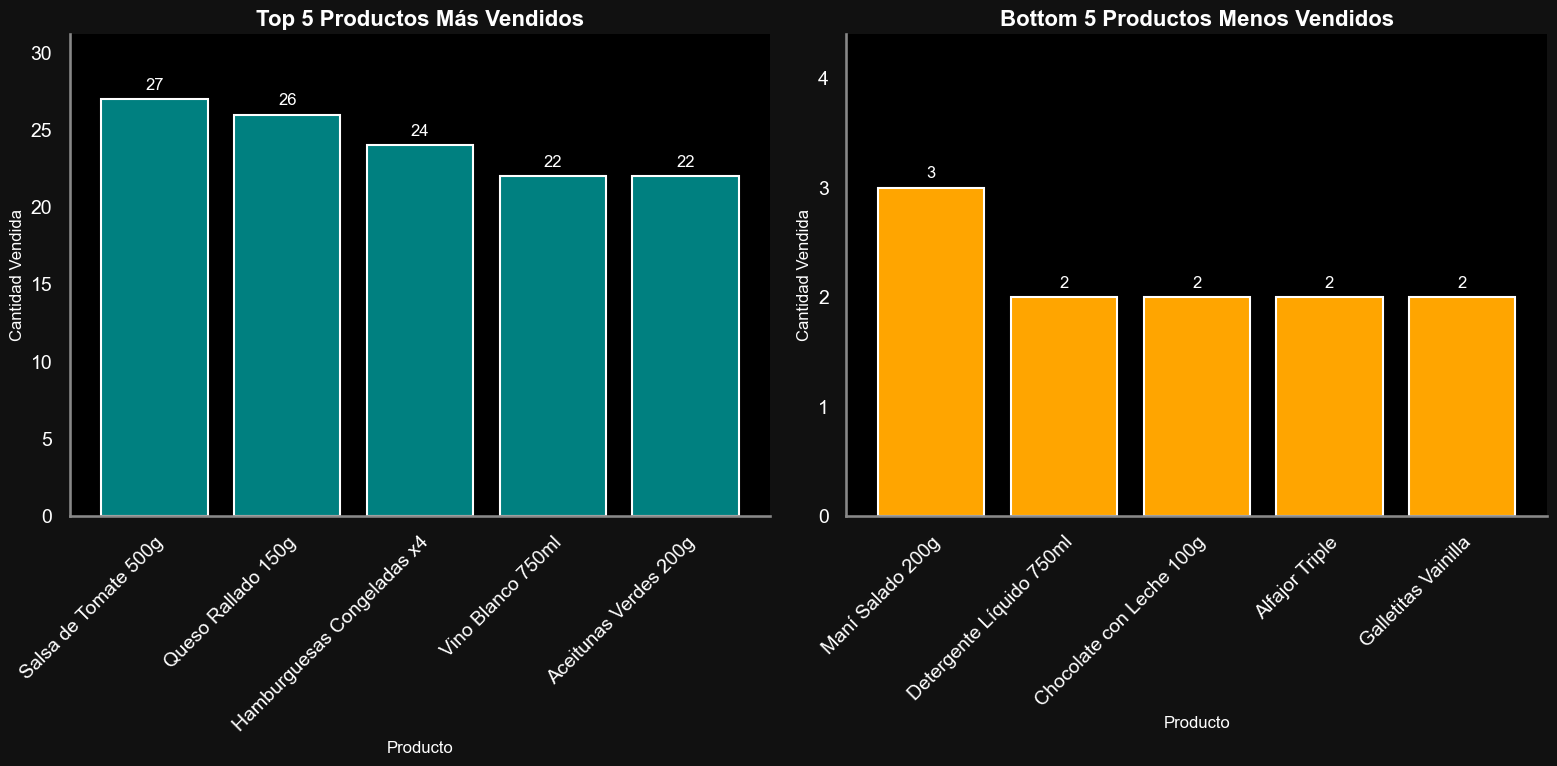

In [11]:
# Agrupar los datos por producto y sumar las cantidades vendidas
producto_ventas = df.groupby('nombre_producto')['cantidad'].sum().sort_values(ascending=False)

# Seleccionar los 5 productos más vendidos
top_productos = producto_ventas.head(5)

# Seleccionar los 5 productos menos vendidos
bottom_productos = producto_ventas.tail(5)

# Convertir las series en DataFrames para asegurarse de que los nombres de los productos aparezcan correctamente
top_productos_df = top_productos.reset_index()
bottom_productos_df = bottom_productos.reset_index()

# Crear figura para ambos gráficos
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# --- Gráfico de los productos más vendidos (Top 5) ---
axes[0].bar(top_productos_df['nombre_producto'], top_productos_df['cantidad'], color='teal', edgecolor='white')
axes[0].set_title('Top 5 Productos Más Vendidos', fontsize=16, color='white', weight='bold')
axes[0].set_xlabel('Producto', fontsize=12, color='white')
axes[0].set_ylabel('Cantidad Vendida', fontsize=12, color='white')
axes[0].tick_params(axis='y', labelcolor='white')
axes[0].set_facecolor('black')

# Rotar y alinear las etiquetas del eje X
plt.setp(axes[0].get_xticklabels(), rotation=45, ha='right', rotation_mode="anchor", color="white")

# --- LÍNEAS AÑADIDAS (Top 5) ---
# 1. Quitar bordes
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# 2. Añadir etiquetas de valor
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}', # int() para quitar decimales
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=12, color='white', xytext=(0, 10),
                     textcoords='offset points')

# 3. Añadir espacio superior
ymin, ymax = axes[0].get_ylim()
axes[0].set_ylim(ymin, ymax * 1.10)
# --- FIN LÍNEAS AÑADIDAS (Top 5) ---


# --- Gráfico de los productos menos vendidos (Bottom 5) ---
axes[1].bar(bottom_productos_df['nombre_producto'], bottom_productos_df['cantidad'], color='orange', edgecolor='white')
axes[1].set_title('Bottom 5 Productos Menos Vendidos', fontsize=16, color='white', weight='bold')
axes[1].set_xlabel('Producto', fontsize=12, color='white')
axes[1].set_ylabel('Cantidad Vendida', fontsize=12, color='white')
axes[1].tick_params(axis='y', labelcolor='white')
axes[1].set_facecolor('black')

# Ajustar el eje Y para que los valores vayan de 1 en 1 (tu código)
# Aumenté el +1 a +2 para dar un poco más de aire al tick más alto
axes[1].yaxis.set_ticks(range(0, int(bottom_productos_df['cantidad'].max()) + 2))

# Rotar y alinear las etiquetas del eje X
plt.setp(axes[1].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor", color="white")

# --- LÍNEAS AÑADIDAS (Bottom 5) ---
# 1. Quitar bordes
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

# 2. Añadir etiquetas de valor
for p in axes[1].patches:
    axes[1].annotate(f'{int(p.get_height())}', # int()
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=12, color='white', xytext=(0, 10),
                     textcoords='offset points')

# 3. Añadir espacio superior
ymin, ymax = axes[1].get_ylim()
axes[1].set_ylim(ymin, ymax * 1.10) # 10% de espacio extra
# --- FIN LÍNEAS AÑADIDAS (Bottom 5) ---


# Mejorar el ajuste de los gráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


### Interpretación

### Top 5 Productos Más Vendidos:
1. **Salsa de Tomate 500g**: Con 25 unidades vendidas, es el producto más popular, con un notable desempeño de ventas.
2. **Queso Rallado 150g**: Con 22 unidades vendidas, muestra una buena aceptación en el mercado.
3. **Hamburguesas Congeladas x4**: Con 21 unidades, es un producto que tiene una demanda constante.
4. **Vino Blanco 750ml**: Este producto también se encuentra entre los más vendidos con 20 unidades.
5. **Aceitunas Verdes 200g**: Con 19 unidades, también forma parte del grupo de productos populares.

### Bottom 5 Productos Menos Vendidos:
1. **Maní Salado 200g**: A pesar de estar entre los menos vendidos con solo 2 unidades, este producto presenta una baja demanda.
2. **Detergente Líquido 750ml**: Similar al maní, se vendieron solo 2 unidades, lo que indica una baja rotación.
3. **Chocolate con Leche 750g**: Con 3 unidades vendidas, muestra un desempeño similar en cuanto a la baja demanda.
4. **Alfajor Triple**: Con 3 unidades, también tiene una baja aceptación en comparación con otros productos.
5. **Galletitas Vainilla**: Con 3 unidades, esta categoría también pertenece a los productos con menor rotación.

## Conclusiones:
- **Productos con Alta Demanda**: Productos como la **Salsa de Tomate 500g** y el **Queso Rallado 150g** lideran las ventas, lo que refleja su popularidad en el mercado. Estos productos tienen un buen desempeño y deberían estar disponibles en stock suficiente.
- **Productos con Baja Demanda**: Artículos como **Maní Salado 200g**, **Detergente Líquido 750ml**, y **Chocolate con Leche 750g** muestran una baja cantidad de ventas. Esto puede indicar que la demanda de estos productos es limitada y que podrían no justificar el mantenimiento de stock.

## Recomendaciones:
- **Aumentar el Stock de Productos Populares**: Para los productos más vendidos, como la **Salsa de Tomate 500g** y **Queso Rallado 150g**, es recomendable asegurar un stock adecuado para evitar quiebres de inventario y mantener la oferta disponible.
- **Estrategias de Marketing para Productos con Baja Demanda**: Para los productos menos vendidos, se podrían considerar campañas de promoción, descuentos o visibilidad en puntos de venta para aumentar su rotación. También es importante revisar la oferta en los canales de venta online y offline para optimizar la estrategia de distribución.
- **Descontinuación de Productos con Baja Demanda**: Para los productos que muestran consistentemente **baja rotación**, como el **Maní Salado 200g**, **Detergente Líquido 750ml**, y **Chocolate con Leche 750g**, se recomienda considerar su **descontinuación** o reemplazo por productos con **mayor aceptación** en el mercado. La eliminación de productos con baja demanda puede **liberar espacio en inventario** y permitir el enfoque en aquellos que realmente aportan a las ventas.
- **Análisis Continuo de Ventas**: Es recomendable realizar un seguimiento constante del desempeño de todos los productos. Las tendencias de venta pueden cambiar con el tiempo, y el análisis de ventas debe realizarse de manera periódica para ajustar el enfoque comercial y de stock.

Este análisis te permitirá tomar decisiones más acertadas sobre el **abastecimiento** y la **optimización de inventarios**, enfocando tus esfuerzos en los productos con mayor demanda y eliminando aquellos con baja rotación.

## 6. Segmentación de Clientes (Análisis RFM)

Utilizamos el modelo RFM (Recencia, Frecuencia, Valor Monetario) para clasificar a nuestros clientes en segmentos accionables.

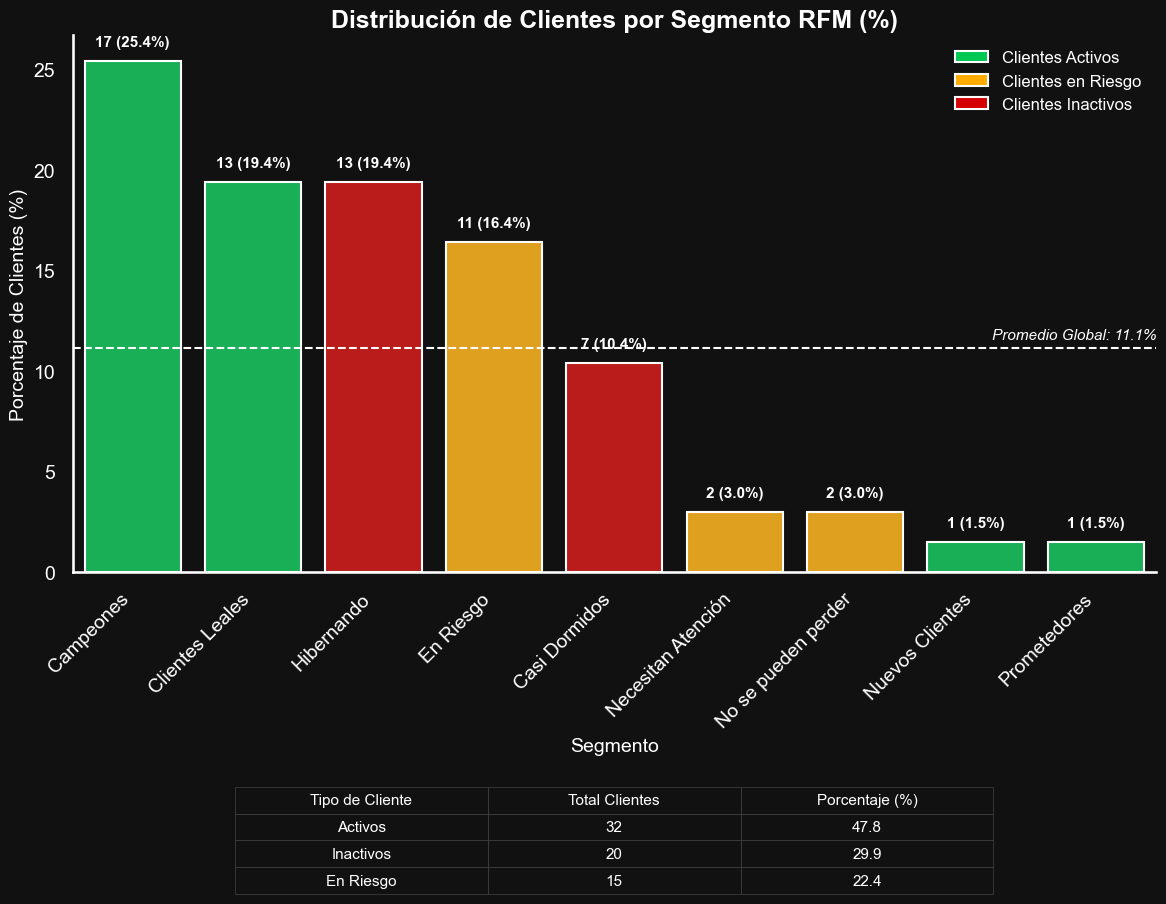

In [12]:
# --- Cálculo RFM ---
hoy = df["fecha"].max() + dt.timedelta(days=1)

rfm = df.groupby('id_cliente').agg({
    'fecha': lambda date: (hoy - date.max()).days,
    'id_venta': 'count',
    'importe': 'sum'
})
rfm.rename(columns={'fecha': 'Recencia', 'id_venta': 'Frecuencia', 'importe': 'Monetario'}, inplace=True)

# --- Quintiles ---
rfm['R_Score'] = pd.qcut(rfm['Recencia'], 5, labels=[5, 4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frecuencia'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm['M_Score'] = pd.qcut(rfm['Monetario'], 5, labels=[1, 2, 3, 4, 5])

# --- Segmentación ---
segment_map = {
    r'[1-2][1-2]': 'Hibernando',
    r'[1-2][3-4]': 'En Riesgo',
    r'[1-2]5': 'No se pueden perder',
    r'3[1-2]': 'Casi Dormidos',
    r'33': 'Necesitan Atención',
    r'[3-4][4-5]': 'Clientes Leales',
    r'41': 'Prometedores',
    r'51': 'Nuevos Clientes',
    r'[4-5][2-5]': 'Campeones'
}
rfm['Segmento'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str)
rfm['Segmento'] = rfm['Segmento'].replace(segment_map, regex=True)

# --- Conteo y porcentaje ---
segment_counts = rfm['Segmento'].value_counts()
segment_percent = (segment_counts / segment_counts.sum() * 100).round(1)
segment_counts_sorted = segment_counts.sort_values(ascending=False)
segment_percent_sorted = segment_percent[segment_counts_sorted.index]

# --- Clasificación por tipo de cliente ---
segment_groups = {
    'Campeones': 'Activos',
    'Clientes Leales': 'Activos',
    'Nuevos Clientes': 'Activos',
    'Prometedores': 'Activos',
    'En Riesgo': 'En Riesgo',
    'No se pueden perder': 'En Riesgo',
    'Necesitan Atención': 'En Riesgo',
    'Casi Dormidos': 'Inactivos',
    'Hibernando': 'Inactivos'
}
color_map = {
    'Activos': '#00C853',
    'En Riesgo': '#FFAB00',
    'Inactivos': '#D50000'
}
colores = [color_map.get(segment_groups.get(seg, 'Inactivos')) for seg in segment_counts_sorted.index]

# --- Resumen ejecutivo por tipo ---
resumen_tipo = (
    rfm['Segmento']
    .map(segment_groups)
    .value_counts()
    .rename_axis('Tipo de Cliente')
    .reset_index(name='Total Clientes')
)
resumen_tipo['Porcentaje (%)'] = (resumen_tipo['Total Clientes'] / resumen_tipo['Total Clientes'].sum() * 100).round(1)

# --- Promedio global ---
promedio_global = segment_percent_sorted.mean()

# --- Estilo visual ---
plt.style.use('dark_background')
plt.rcParams.update({
    "axes.facecolor": "#111111",
    "figure.facecolor": "#111111",
    "axes.spines.top": False,
    "axes.spines.right": False
})

# --- Gráfico principal ---
fig, ax = plt.subplots(figsize=(12, 8))

sns.barplot(
    x=segment_counts_sorted.index,
    y=segment_percent_sorted.values,
    hue=segment_counts_sorted.index,
    palette=colores,
    dodge=False,
    legend=False,
    ax=ax
)

# Línea de promedio global
ax.axhline(promedio_global, color='white', linestyle='--', linewidth=1.5)
ax.text(len(segment_counts_sorted) - 0.5, promedio_global + 0.3,
        f"Promedio Global: {promedio_global:.1f}%",
        color='white', fontsize=11, ha='right', va='bottom', style='italic')

# Etiquetas y títulos
ax.set_title('Distribución de Clientes por Segmento RFM (%)', fontsize=18, weight='bold', color='white')
ax.set_xlabel('Segmento', fontsize=14, color='white')
ax.set_ylabel('Porcentaje de Clientes (%)', fontsize=14, color='white')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', color='white')
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', color='white')
ax.tick_params(axis='y', colors='white')

# Etiquetas de texto
for i, (segmento, pct) in enumerate(zip(segment_counts_sorted.index, segment_percent_sorted.values)):
    valor = segment_counts_sorted[segmento]
    ax.text(i, pct + 0.6, f"{valor} ({pct:.1f}%)",
            ha='center', va='bottom', fontsize=11, color='white', weight='bold')

# Leyenda personalizada
legend_elements = [
    Patch(facecolor='#00C853', label='Clientes Activos'),
    Patch(facecolor='#FFAB00', label='Clientes en Riesgo'),
    Patch(facecolor='#D50000', label='Clientes Inactivos')
]
ax.legend(handles=legend_elements, loc='upper right', frameon=False, fontsize=12, labelcolor='white')

# --- Tabla resumen ejecutiva ---
tabla_datos = resumen_tipo.values.tolist()
columnas = resumen_tipo.columns.tolist()

# Añadir tabla bajo el gráfico
table = plt.table(cellText=tabla_datos,
                  colLabels=columnas,
                  cellLoc='center',
                  loc='bottom',
                  bbox=[0.15, -0.6, 0.7, 0.2])  # posición y tamaño
table.auto_set_font_size(False)
table.set_fontsize(11)

# Estilo de la tabla
for (row, col), cell in table.get_celld().items():
    cell.set_edgecolor('#444')
    cell.set_linewidth(0.5)
    cell.set_text_props(color='white')
    cell.set_facecolor('#111111')

plt.subplots_adjust(bottom=0.5)
plt.tight_layout()
plt.show()

### 📊 Análisis RFM — Segmentación de Clientes

El gráfico muestra la distribución de los clientes por segmentos RFM, agrupados según su nivel de actividad:

- 🟩 **Clientes Activos (Campeones, Leales, Prometedores, Nuevos):**  
  Representan la mayor proporción, destacándose los “Campeones” y “Leales”. Estos clientes deben ser **priorizados para fidelización y recompra**.

- 🟧 **Clientes en Riesgo (En Riesgo, No se pueden perder, Necesitan Atención):**  
  Muestran señales de **desconexión**. Se recomienda aplicar **campañas de retención** y descuentos personalizados.

- 🟥 **Clientes Inactivos (Casi Dormidos, Hibernando):**  
  Su baja frecuencia y recencia indican pérdida de interés. Se sugiere **reactivarlos** mediante mensajes de reenganche o promociones.

La **línea discontinua blanca** marca el **promedio global de clientes por segmento**, facilitando la identificación de grupos prioritarios.

### 💡 Recomendaciones Estratégicas

- **Recompensar la lealtad** de los clientes activos (programas VIP, beneficios exclusivos).  
- **Reactivar los clientes en riesgo** con promociones limitadas o recordatorios de recompra.  
- **Diseñar campañas de recuperación** para clientes inactivos con descuentos agresivos o mensajes personalizados.  
- **Monitorear mensualmente** la evolución de cada grupo para adaptar las estrategias de marketing.



## 7. Análisis de Canasta de Mercado (Reglas de Asociación)

Utilizamos el algoritmo Apriori para descubrir qué productos se compran juntos con frecuencia, lo que permite identificar oportunidades de venta cruzada.

### Relaciones entre productos (Apriori)

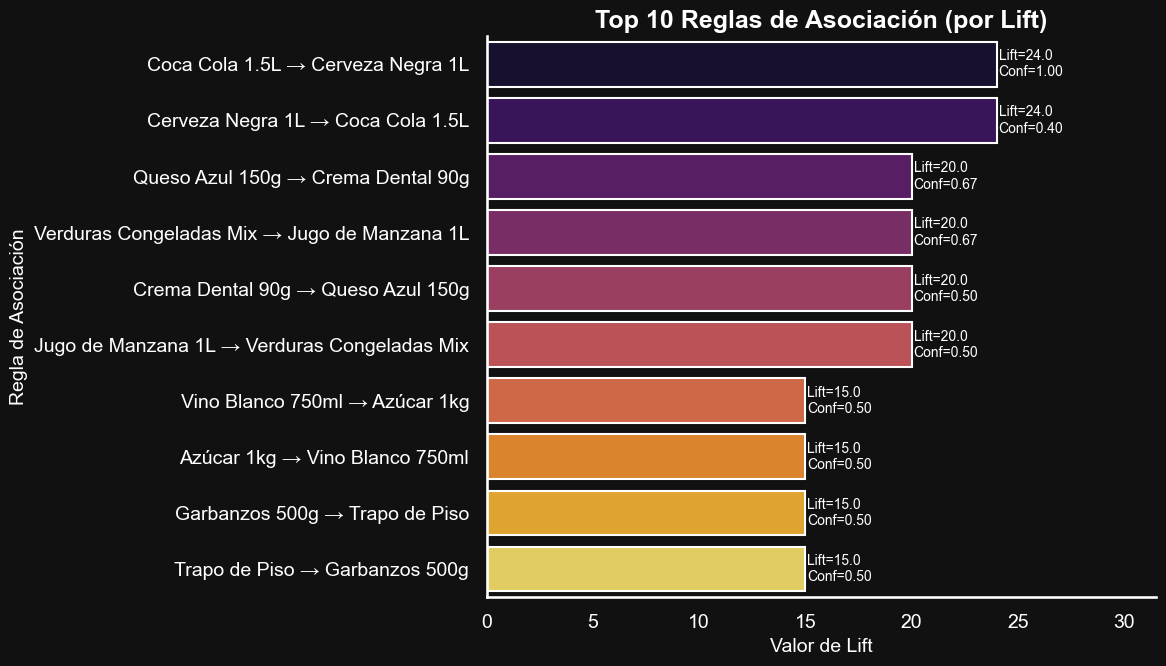

In [13]:
# -----------------------------------------------------------------
# PASO 1: PREPARAR LOS DATOS (Tu lógica original de Apriori)
# -----------------------------------------------------------------
# Se transforma el dataframe para tener un formato de canasta de mercado
basket = df.groupby(['id_venta', 'nombre_producto'])['cantidad'].sum().unstack().reset_index().fillna(0).set_index('id_venta')

# Se convierten las cantidades a valores booleanos
def encode_units(x):
    return x >= 1

basket_sets = basket.map(encode_units)

# -----------------------------------------------------------------
# PASO 2: GENERAR LAS REGLAS (Tu lógica original de Apriori)
# -----------------------------------------------------------------
# Se aplica el algoritmo Apriori
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

# Se generan las reglas de asociación
# ¡AQUÍ SE CREA 'rules'!
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)


# -----------------------------------------------------------------
# PASO 3: DIBUJAR EL GRÁFICO DE BARRAS (Lógica de la Celda 16)
# -----------------------------------------------------------------

# --- ¡CORRECCIÓN AQUÍ! ---
# Se ordena por Lift y LUEGO por Confianza para romper empates
top_rules = rules.sort_values(['lift', 'confidence'], ascending=[False, False]).head(10).copy()
# --------------------------

# Creamos la etiqueta 'pair' para el gráfico
top_rules['pair'] = top_rules.apply(
    lambda row: f"{', '.join(list(row['antecedents']))} → {', '.join(list(row['consequents']))}", axis=1
)

# Configuración visual
plt.figure(figsize=(12, 7))

ax = sns.barplot(
    y='pair',
    x='lift',
    data=top_rules,
    palette='inferno',
    hue='pair'  # Con esto se cumple con la advertencia
)

# Títulos y etiquetas
plt.title('Top 10 Reglas de Asociación (por Lift)', fontsize=18, weight='bold', color='white')
plt.xlabel('Valor de Lift', fontsize=14, color='white')
plt.ylabel('Regla de Asociación', fontsize=14, color='white')

# Ajustes de ejes
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

# Etiquetas de texto en las barras
for i, (lift, conf) in enumerate(zip(top_rules['lift'], top_rules['confidence'])):
    ax.text(lift + 0.1, i, f"Lift={lift:.1f}\nConf={conf:.2f}", color='white', va='center', fontsize=10)

# Espacio extra en el eje X
xmin, xmax = ax.get_xlim()
ax.set_xlim(xmin, xmax * 1.25)

plt.tight_layout()

# Se usa plt.show() para mostrar en el notebook
plt.show()

### 🧩 **Análisis de Canasta de Mercado (Reglas de Asociación)**

El objetivo de este análisis es identificar **combinaciones frecuentes de productos** adquiridos por los clientes, con el fin de descubrir **oportunidades de venta cruzada (cross-selling)** y optimización en la disposición de productos.

### Interpretación Recomendada

#### 🔶 **Gráfico de Barras – Top 10 Reglas por Lift**

Este gráfico cuantifica las reglas más fuertes ordenadas por su valor de **Lift**, que mide la **fuerza de la relación** entre productos.

#### 📈 **Principales Reglas Identificadas:**
| # | Regla | Lift | Confianza |
|:-:|:------|:----:|:----------:|
| 1 | 🥤 Coca Cola 1.5L → Cerveza Negra 1L | **24.0** | **1.00** |
| 2 | 🍺 Cerveza Negra 1L → Coca Cola 1.5L | **24.0** | **0.40** |
| 3 | 🧀 Queso Azul 150g → Crema Dental 90g | **20.0** | **0.67** |
| 4 | 🍎 Verduras Congeladas Mix → Jugo de Manzana 1L | **20.0** | **0.67** |
| 5 | 🍷 Azúcar 1kg → Vino Blanco 750ml | **15.0** | **0.50** |

#### 💬 **Interpretación:**
* Las reglas con **Lift > 10** indican **asociaciones no aleatorias y muy fuertes**.
* Los valores de **Confianza (≥ 0.6)** muestran alta probabilidad de coocurrencia entre productos.
* Estas combinaciones pueden emplearse para:
    * Crear **ofertas conjuntas** (“Compra A y lleva B con descuento”).
    * **Optimizar el layout** en el punto de venta.
    * **Ajustar el stock** de productos que se venden juntos.

---

### 🧾 **Conclusión General**

El análisis Apriori revela **comportamientos de compra recurrentes** entre categorías de bebidas, lácteos y alimentos del hogar.
Las asociaciones detectadas son **estadísticamente fuertes y comercialmente útiles**, permitiendo:

* Implementar **estrategias de cross-selling efectivas**.
* **Aumentar el ticket promedio** mediante productos complementarios.
* **Predecir demanda conjunta** para una mejor gestión del inventario.

---

> 💡 **Recomendación:**
> Incorporar este análisis en la rutina de planificación comercial mensual, actualizando las reglas conforme se registren nuevas ventas, para detectar cambios en los patrones de consumo.

## 8. Análisis de Pareto o la regla 80/20

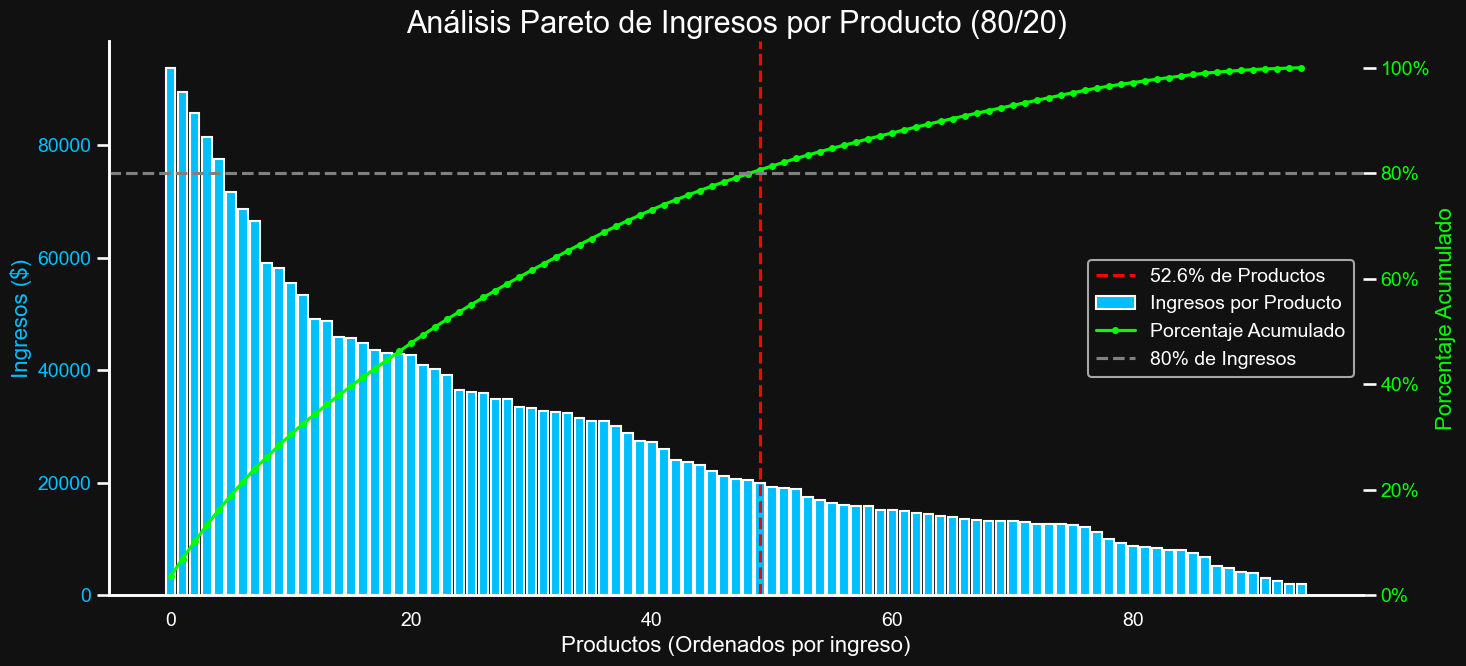

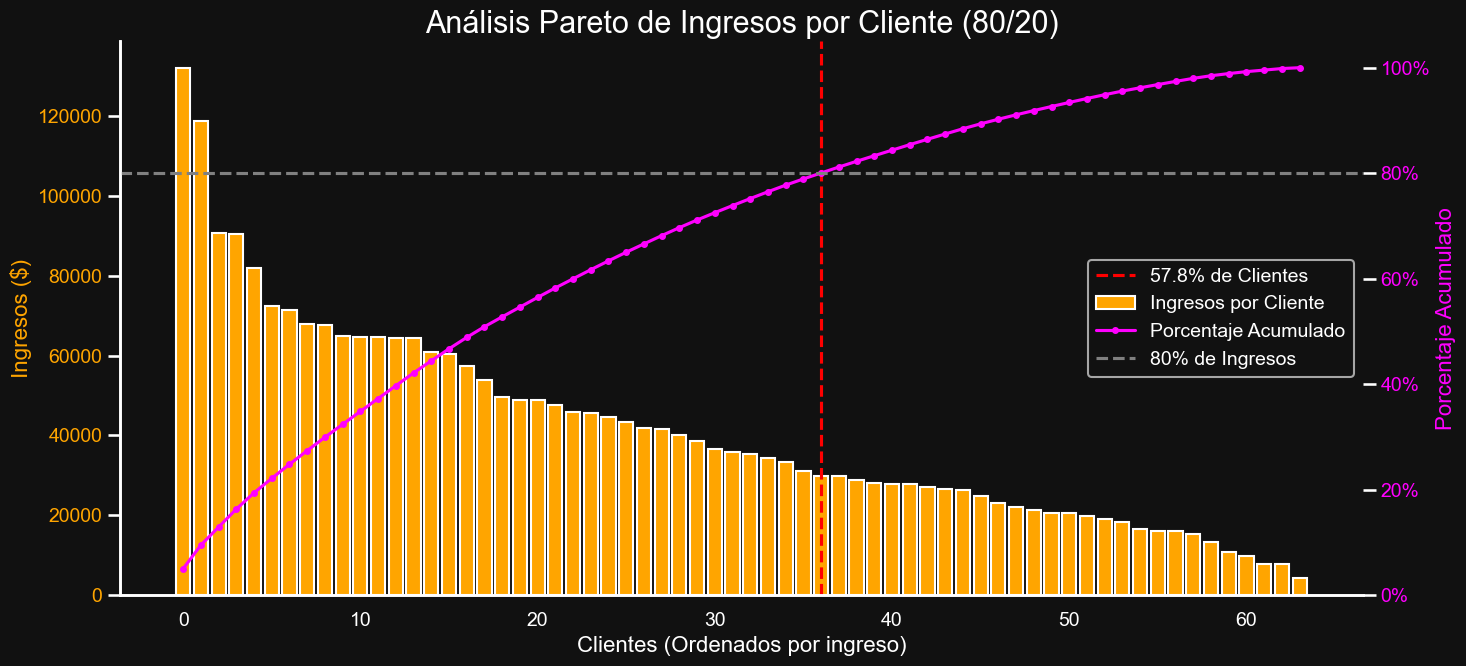

In [14]:
# --- Cargar DataFrame ---
# (Asumiendo que 'df' ya existe en memoria, como en tu código)
import sys


if 'df' not in locals() and 'df' not in globals():
    try:
        df = pd.read_csv("clean_sales.csv")
    except FileNotFoundError:
        print("Error: No se encontró el archivo 'clean_sales.csv'.")
        sys.exit("Archivo no encontrado. Deteniendo.")
# --------------------------------------------------------


# --- Función Reutilizable (Refactorizada: no guarda archivos) ---
def analizar_y_graficar_pareto(dataframe, columna_grupo, metrica_valor, nombre_entidad, nombre_archivo, color_barra, color_linea):
    """
    Realiza un análisis de Pareto y genera un gráfico.
    VERSIÓN SÚPER-SILENCIOSA: Solo muestra el gráfico, no guarda CSV ni PNG.
    """
    
    # 1. Agrupar y ordenar
    ventas_agrupadas = dataframe.groupby(columna_grupo)[metrica_valor].sum().sort_values(ascending=False)
    df_pareto = pd.DataFrame(ventas_agrupadas).reset_index()

    # 2. Calcular porcentajes
    df_pareto['porcentaje'] = df_pareto[metrica_valor] / df_pareto[metrica_valor].sum()
    df_pareto['porcentaje_acumulado'] = df_pareto['porcentaje'].cumsum()

    # 3. Encontrar el punto de corte del 80% (CÁLCULO NECESARIO)
    total_entidades = len(df_pareto)
    pct_entidades_80 = None
    crossover_index = None

    try:
        crossover_index = df_pareto[df_pareto['porcentaje_acumulado'] >= 0.80].index[0]
        num_entidades_80 = crossover_index + 1
        pct_entidades_80 = num_entidades_80 / total_entidades
    except IndexError:
        pass

    # --- CAMBIO AQUÍ: Guardado de CSV desactivado ---
    # 4. Guardar los datos del análisis (ACCIÓN DESACTIVADA)
    # archivo_csv = f"{nombre_archivo}.csv"
    # df_pareto.to_csv(archivo_csv, index=False)
    # ------------------------------------------------

    # 5. Graficar Pareto
    fig, ax1 = plt.subplots(figsize=(15, 7))
    
    color_lineas_guia = 'gray'
    color_linea_corte = 'red'

    # Gráfico de barras
    ax1.bar(df_pareto.index, df_pareto[metrica_valor], color=color_barra, label=f'Ingresos por {nombre_entidad}')
    ax1.set_xlabel(f'{nombre_entidad}s (Ordenados por ingreso)') 
    ax1.set_ylabel(f'Ingresos ($)', color=color_barra)
    ax1.tick_params(axis='y', labelcolor=color_barra)

    # Eje Y secundario
    ax2 = ax1.twinx()
    ax2.plot(df_pareto.index, df_pareto['porcentaje_acumulado'], color=color_linea, marker='o', ms=4, label='Porcentaje Acumulado')
    ax2.set_ylabel('Porcentaje Acumulado', color=color_linea)
    ax2.tick_params(axis='y', labelcolor=color_linea)
    ax2.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0))
    ax2.set_ylim(0, 1.05)
    
    # Líneas de guía
    ax2.axhline(0.80, color=color_lineas_guia, linestyle='--', label='80% de Ingresos')
    
    if pct_entidades_80 is not None and crossover_index is not None:
        ax1.axvline(crossover_index, color=color_linea_corte, linestyle='--', label=f'{pct_entidades_80 * 100:.1f}% de {nombre_entidad}s')

    plt.title(f'Análisis Pareto de Ingresos por {nombre_entidad} (80/20)')
    fig.tight_layout()
    
    # Leyenda
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='center right')

    # --- CAMBIO AQUÍ: Guardado de PNG desactivado ---
    # Guardar el gráfico (ACCIÓN DESACTIVADA)
    # archivo_png = f"{nombre_archivo}.png"
    # plt.savefig(archivo_png)
    # ------------------------------------------------
    
    # --- SALIDA PRINCIPAL ---
    plt.show() # Esto mostrará el gráfico en el notebook
    
    plt.close(fig) # Cerrar la figura para liberar memoria

# --- Ejecutar Análisis ---

# 1. Por Producto (Azul y Verde)
analizar_y_graficar_pareto(
    dataframe=df,
    columna_grupo='nombre_producto',
    metrica_valor='importe',
    nombre_entidad='Producto',
    nombre_archivo='pareto_productos',
    color_barra='deepskyblue',
    color_linea='lime'
)

# 2. Por Cliente (Naranja y Fucsia)
analizar_y_graficar_pareto(
    dataframe=df,
    columna_grupo='nombre_cliente',
    metrica_valor='importe',
    nombre_entidad='Cliente',
    nombre_archivo='pareto_clientes',
    color_barra='orange',
    color_linea='fuchsia'
)

## Interpretacion
### Pareto de Productos
**Hallazgo:** El 80% de los ingresos es generado por solo el 52.63% de los productos (50 de 95).

**Conclusión:** Es un claro principio de Pareto (en este caso, un "53/80"). La rentabilidad está concentrada en la mitad del catálogo, mientras la otra mitad ("cola larga") tiene bajo rendimiento.

**Acción:** Proteger y priorizar (stock, marketing) el 53% de productos "vitales". Optimizar o liquidar el 47% de productos de "cola larga".

### Pareto de Clientes
**Hallazgo:** El 80% de los ingresos es generado por solo el 57.81% de los clientes (37 de 64).

**Conclusión:** Se confirma el principio de Pareto (un "58/80"). El negocio depende de este "núcleo vital" de clientes, haciendo su retención más crítica que la adquisición.

**Acción:** Fidelizar al 58% de clientes "vitales" (programas VIP, atención personalizada). Reactivar al 42% de clientes "ocasionales" (campañas de goteo, cross-selling).

# 9. Estrategias y Plan de Acción

Basado en los hallazgos y conclusiones específicas detalladas en cada sección anterior, se presenta el plan de acción consolidado para el negocio.

# 🧭 Estrategias y Recomendaciones

Se proponen las siguientes acciones estratégicas, agrupadas por área de impacto:

### 1. Estrategia de Foco en el Cliente (Basada en RFM, Pareto y Outliers)

Esta estrategia se centra en gestionar el ~58% de clientes "vitales" que generan el 80% de los ingresos, así como en recuperar a los inactivos.

* **Prioridad #1 - Fidelización (Campeones y Leales):** Implementar un programa de "Clientes VIP" (Club de puntos, acceso exclusivo) para los segmentos que ya son leales.
* **Prioridad #2 - Reactivación (En Riesgo):** Diseñar campañas de marketing personalizadas (email o cupones) dirigidas específicamente a los segmentos que han reducido su frecuencia.
* **Prioridad #3 - Investigación de Alto Valor (Outliers):** Filtrar e investigar activamente a los clientes que generaron transacciones atípicas (ej. > $20,000) para crear un segmento "VIP Premium" con estrategias de fidelización personalizadas (ej. atención directa, catálogo exclusivo).
* **Prioridad #4 - Recuperación de Inactivos:** Diseñar una campaña de "Win-Back" (Recuperación) de alto impacto (ej. 25% OFF) dirigida a los **31 clientes registrados** que no realizaron ninguna compra en este período.

### 2. Estrategia Comercial (Basada en Canasta y Temporalidad)

Esta estrategia busca aumentar el valor del ticket promedio y optimizar el calendario de marketing.

* **Bundles Inteligentes:** Crear "Combos" basados en las reglas de asociación (ej. *Combo Bebidas: Coca + Cerveza Negra*, *Combo Frescos: Verduras + Jugo*).
* **Layout de Tienda:** Reorganizar físicamente las góndolas para posicionar los productos asociados (ej. Garbanzos y Trapos de Piso) en pasillos cercanos para fomentar la compra impulsiva.
* **Calendario Promocional:**
    * Lanzar una campaña agresiva en **Abril** (mes más bajo).
    * Crear promociones de tráfico para los **Sábados** (día más bajo), ej. "Sábados de Ahorro".
    * Asegurar el stock y la mejor atención los **Martes** (día más fuerte).

### 3. Estrategia de Operaciones y Expansión (Basada en Geo, Pagos y Pareto)

Esta estrategia se enfoca en la eficiencia del inventario y la optimización de los canales de pago y mercados.

* **Eficiencia de Pagos:** Incentivar activamente el uso de **QR** (ej. "Pagando con QR, participas de...") para reducir los costos y riesgos del manejo de efectivo.
* **Expansión Local:** Antes de considerar nuevas ciudades, lanzar campañas de marketing geo-localizadas (pauta en redes) en **Mendiolaza** y **Carlos Paz** para aumentar la penetración.
* **Gestión de Inventario (Foco):**
    * **Vitales:** Utilizar el Pareto "53/80" para redefinir los niveles de stock de seguridad. El 53% de productos "vitales" *nunca* debe tener quiebres de stock.
    * **Inactivos:** Evaluar la **descontinuación o liquidación** de los **5 productos del catálogo** (ej. Sidra 750ml, Suavizante 1L) que no registraron ventas, para reducir costos de almacenamiento y capital inmovilizado.

---

# 📅 Plan 30/60/90 Días

| Plazo | Acciones |
|-------|-----------|
| **30 días** | Lanzamiento de 2 bundles + cupón de retención (para "En Riesgo") + incentivo QR + **Inicio de investigación de VIPs (outliers).** |
| **60 días** | Programa de puntos (para "Campeones") + reorganización de góndola + **Lanzamiento de campaña "Win-Back" para 31 clientes inactivos.** |
| **90 días** | Evaluar recompra por cohortes + ampliación de bundles + **Decisión sobre descontinuación de 5 productos inactivos.** |

---

# 📈 Próximos Pasos (Análisis Futuros)

Para continuar profundizando, se sugieren los siguientes análisis:

**Gráficos:**
* Heatmap Día × Hora (si hay timestamp).
* Ticket promedio por método de pago.
* Cohortes de recompra (30/60/90 días).

**Tablas:**
* Top 10 clientes por *Monetario* y *Frecuencia*.
* Top 10 asociaciones por *Lift*.

---

# 🧩 Síntesis Final

El análisis confirma que el negocio presenta:
* **Crecimiento sostenido**, aunque concentrado geográficamente.
* **Oportunidades claras de retención y fidelización**, tanto en clientes "En Riesgo" como en "Inactivos".
* **Potencial de mejora operativa** mediante digitalización de pagos y una gestión de inventario basada en datos (activos e inactivos).

La adopción de las estrategias propuestas puede incrementar la **recurrencia**, **valor promedio por cliente** y la **eficiencia de ventas** en un horizonte de corto a mediano plazo.